In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Read in csv
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


## Select features (columns)

In [6]:
# Set target, features and feature_names.
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


## Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

## Train the Model (Random Forest)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_minmax, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
print(f"Training Data Score: {rf.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_minmax, y_test)}")

Training Data Score: 0.9948502765592219
Testing Data Score: 0.8832951945080092


In [12]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10882347012994631, 'koi_fpflag_nt'),
 (0.0976741866542492, 'koi_fpflag_co'),
 (0.06476897613579799, 'koi_fpflag_ss'),
 (0.06355717786764907, 'koi_model_snr'),
 (0.05263137610512111, 'koi_prad'),
 (0.0385975220132582, 'koi_prad_err2'),
 (0.03404317392220799, 'koi_duration_err1'),
 (0.03285064778478532, 'koi_duration_err2'),
 (0.032280879915475305, 'koi_fpflag_ec'),
 (0.03185238868884035, 'koi_insol_err1'),
 (0.029397330786552982, 'koi_prad_err1'),
 (0.02804325234107563, 'koi_period_err2'),
 (0.02105388951651415, 'koi_period'),
 (0.021036320006755142, 'koi_time0bk_err1'),
 (0.020102599159242153, 'koi_steff_err1'),
 (0.019657959096120236, 'koi_duration'),
 (0.018743969493268522, 'koi_teq'),
 (0.018169492179489436, 'koi_steff_err2'),
 (0.01796998267253122, 'koi_time0bk_err2'),
 (0.017517462221038525, 'koi_insol_err2'),
 (0.017380870969898737, 'koi_time0bk'),
 (0.016890820360853487, 'koi_impact'),
 (0.016197231563967247, 'koi_slogg_err2'),
 (0.013935269965103803, 'koi_srad_err1'),
 (0.0

## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=125, n_estimators=250 .................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.903, total=   2.2s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.890, total=   2.2s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.885, total=   2.2s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.902, total=   2.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.886, total=   2.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.884, total=   2.9s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.903, total=   3.7s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.889, total=   3.5s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.883, total=   3.1s
[CV] max_depth=150, n_estimators=250 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 175, 'n_estimators': 300}
0.8931909212283045


In [16]:
# Training score:
grid.score(X_train_minmax, y_train)

1.0

In [17]:
# Testing score:
grid.score(X_test_minmax, y_test)

0.8993135011441648

In [18]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_minmax)

In [19]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.76      0.79       411
     CONFIRMED       0.83      0.85      0.84       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



In [20]:
# %matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train_minmax, y_train)
viz.score(X_test_minmax, y_test)
viz.finalize()
viz.show(outpath="Images/randomforest_classificationreport.png")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


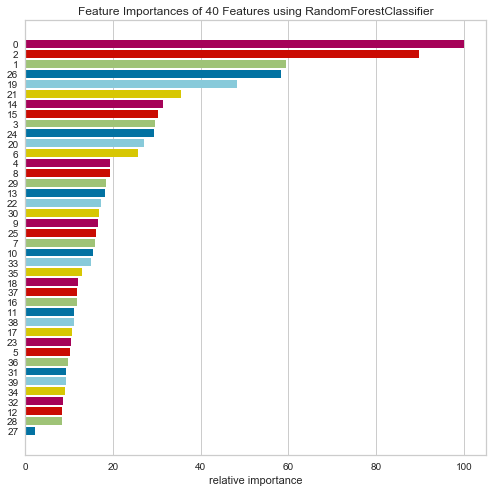

In [21]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('yellowbrick')
viz = FeatureImportances(rf, size=(500, 500))
viz.fit(X_train_minmax, y_train)
viz.show(outpath="Images/featureimportance.png")

## Save the Model

In [23]:
import joblib
filename = 'Models/zGrinacoff_randomForest.sav'
joblib.dump(rf, filename)

['Models/zGrinacoff_randomForest.sav']